In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# from xgboost import XGBRegressor
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


data_train = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_train_tech_nonscaled.parquet')

data_test = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/updated_standardization/data_set_test_tech_nonscaled.parquet')

firm_data = pd.read_parquet('/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Firm_variables/daily_firm_data_median_new.parquet')

# List of columns to drop
columns_to_drop = ['trading_days_till_exp'] + list(firm_data.columns[2:]) + ['moneyness_squared', 'tau_squared', 'moneyness_tau', 'best_offer_option', 'best_bid_option']
# # columns_to_drop = ['trading_days_till_exp']


# Drop columns from datasets if they exist
data_train = data_train.drop(columns=columns_to_drop, errors='ignore')
test_data = data_test.drop(columns=columns_to_drop, errors='ignore')

# Ensure that data_val and data_test have the same column order as data_train
data_test = data_test[data_train.columns]

data_trains = data_train.copy()

# data_train = data_trains[data_trains['date'] < '2020-01-01']
# data_validate = data_trains[data_trains['date'] >= '2020-01-01']

# (data_test)


In [4]:
# # Assuming 'data_train' and 'data_test' are already defined and loaded

# # Top features for Call and Put options
# # Top features for Call and Put options
# top_features_c = ['cp_flag', 'Ticker', 'date', 'impl_volatility', 'prev_day_iv', 'T', 'volume_option', 'prev2_day_iv', 'gold_price']
# top_features_p = ['cp_flag', 'Ticker', 'date', 'impl_volatility', 'prev_day_iv', 'T', 'volume_option', 'prev2_day_iv', '5_day_rolling_return_stock']

top_features_c =['cp_flag', 'Ticker', 'date', 'impl_volatility','prev_day_iv', 'T', 'vol_stock', 'prev2_day_iv', 'hi-lo_stock', '1Y_bond', 'spread_stock', 'spread_vix', 'moneyness', '5_day_rolling_return_stock']
top_features_p =['cp_flag', 'Ticker', 'date', 'impl_volatility','prev_day_iv', 'T', 'vol_stock', 'prev2_day_iv', 'hi-lo_stock', '5_day_rolling_return_stock', 'RET', 'moneyness', 'PRC_actual', 'CLOSE_vix']


# top_features_c = ['cp_flag', 'Ticker', 'date', 'impl_volatility', 'prev_day_iv', 'T', 'vol_stock', 'prev2_day_iv', 'hi-lo_stock', '1Y_bond']
# top_features_p = ['cp_flag', 'Ticker', 'date', 'impl_volatility', 'prev_day_iv', 'T', 'vol_stock', 'prev2_day_iv', 'hi-lo_stock']


# # Prepare train data for Call and Put options
data_train_c = data_train[data_train['cp_flag'] == 'C'][top_features_c]
data_train_p = data_train[data_train['cp_flag'] == 'P'][top_features_p]

# # Prepare validation data for Call and Put options
# # data_validate_c = data_validate[data_validate['cp_flag'] == 'C'][top_features_c]
# # data_validate_p = data_validate[data_validate['cp_flag'] == 'P'][top_features_p]

# # Prepare test data for Call and Put options
data_test_c = data_test[data_test['cp_flag'] == 'C'][top_features_c]
data_test_p = data_test[data_test['cp_flag'] == 'P'][top_features_p]

# # data_test_c

# All features

In [5]:
# # Prepare train data for Call and Put options
data_train_c = data_train[data_train['cp_flag'] == 'C']
data_train_p = data_train[data_train['cp_flag'] == 'P']

# # Prepare validation data for Call and Put options
# # data_validate_c = data_validate[data_validate['cp_flag'] == 'C'][top_features_c]
# # data_validate_p = data_validate[data_validate['cp_flag'] == 'P'][top_features_p]

# # Prepare test data for Call and Put options
data_test_c = data_test[data_test['cp_flag'] == 'C']
data_test_p = data_test[data_test['cp_flag'] == 'P']

In [6]:
data_test_c

,cp_flag,Ticker,date,moneyness,impl_volatility,T,prev_day_iv,prev2_day_iv,volume_option,spread_option,...,gold_price,reces_indi,10Y_RIR,1Y_bond,2Y_bond,OPEN_vix,HIGH_vix,LOW_vix,CLOSE_vix,spread_vix
0,C,AAPL,2021-01-04,-0.475,0.433412,0.019841,0.337114,0.325650,28062,0.02,...,672.012903,3.036452,0.93,0.1074,0.1400,21.29,22.49,20.57,21.20,1.92
1,C,AAPL,2021-01-04,-0.345,0.428775,0.019841,0.332640,0.312515,76970,0.02,...,672.012903,3.036452,0.93,0.1074,0.1400,21.29,22.49,20.57,21.20,1.92
2,C,AAPL,2021-01-04,-0.216,0.426358,0.019841,0.330864,0.308907,28786,0.02,...,672.012903,3.036452,0.93,0.1074,0.1400,21.29,22.49,20.57,21.20,1.92
3,C,AAPL,2021-01-04,-0.088,0.422649,0.019841,0.329431,0.306933,48208,0.02,...,672.012903,3.036452,0.93,0.1074,0.1400,21.29,22.49,20.57,21.20,1.92
4,C,AAPL,2021-01-04,0.039,0.421479,0.019841,0.328318,0.305940,45948,0.01,...,672.012903,3.036452,0.93,0.1074,0.1400,21.29,22.49,20.57,21.20,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36347,C,TSLA,2021-12-30,1.556,0.742669,0.007937,0.718058,0.773147,9563,0.01,...,632.874194,-0.206774,1.55,0.4878,0.8182,14.36,14.60,12.56,12.85,2.04
36348,C,TSLA,2021-12-30,1.658,0.764381,0.007937,0.735985,0.789361,2727,0.05,...,632.874194,-0.206774,1.55,0.4878,0.8182,14.36,14.60,12.56,12.85,2.04
36349,C,TSLA,2021-12-30,1.760,0.786317,0.007937,0.754168,0.807648,4951,0.04,...,632.874194,-0.206774,1.55,0.4878,0.8182,14.36,14.60,12.56,12.85,2.04
36350,C,TSLA,2021-12-30,1.861,0.798978,0.007937,0.773210,0.821686,4227,0.04,...,632.874194,-0.206774,1.55,0.4878,0.8182,14.36,14.60,12.56,12.85,2.04


In [7]:
# import time
# import itertools
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import pandas as pd

# def prepare_data_with_gridsearch(train_data, validate_data, test_data, option_type, verbose=True):
#     """
#     Prepare the data, perform hyperparameter tuning using Year 1 (train) and Year 2 (validation),
#     retrain the model on Year 1 + Year 2, and evaluate on Year 3 (test).
    
#     Parameters:
#     train_data (pd.DataFrame): The training dataset (Year 1).
#     validate_data (pd.DataFrame): The validation dataset (Year 2).
#     test_data (pd.DataFrame): The testing dataset (Year 3).
#     option_type (str): Call or Put option type for labeling the print output.
#     verbose (bool): If True, prints progress information for hyperparameter tuning.
#     """
#     # Prepare the train, validation, and test data
#     X_train = train_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Training features (Year 1)
#     y_train = train_data['impl_volatility']  # Training target (Year 1)

#     X_validate = validate_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Validation features (Year 2)
#     y_validate = validate_data['impl_volatility']  # Validation target (Year 2)
    
#     X_test = test_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Test features (Year 3)
#     y_test = test_data['impl_volatility']  # Test target (Year 3)


#     # Define the hyperparameter grid
#     # param_grid = {
#     #     'max_depth': [5, 7, 9, 11],                 
#     #     'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],             
#     #     'learning_rate': [0.005, 0.01, 0.05, 0.1],             
#     # }
    
#     param_grid = {'learning_rate': [0.01], 'max_depth': [5], 'n_estimators': [500]}
#     # param_grid = {'learning_rate': [0.01], 'max_depth': [3], 'n_estimators': [700]}
#     # param_grid = {'learning_rate': [0.01], 'max_depth': [11], 'n_estimators': [700]}

#     # Generate all combinations of hyperparameters
#     param_combinations = list(itertools.product(
#         param_grid['max_depth'], 
#         param_grid['n_estimators'], 
#         param_grid['learning_rate']
#     ))

#     total_combinations = len(param_combinations)
    
#     # Initialize variables to store the best model and best score
#     best_rmse_val = np.inf
#     best_params = None
#     best_xgb_model = None

#     print(f"Running manual hyperparameter tuning for {option_type} Options...")
    
#     # Iterate over all hyperparameter combinations with progress tracking
#     for i, (max_depth, n_estimators, learning_rate) in enumerate(param_combinations):
#         start_time = time.time()
        
#         # Initialize the XGBRegressor with the current set of hyperparameters
#         xgb_model = XGBRegressor(
#             max_depth=max_depth, 
#             n_estimators=n_estimators,
#             learning_rate=learning_rate,
#             objective='reg:squarederror',
#             n_jobs=-1
#         )

#         # Train the model on the training data (Year 1)
#         xgb_model.fit(X_train, y_train)

#         # Validate the model on the validation data (Year 2)
#         y_val_pred = xgb_model.predict(X_validate)
#         rmse_val = np.sqrt(mean_squared_error(y_validate, y_val_pred))

#         # Track the best performing hyperparameters based on validation RMSE
#         if rmse_val < best_rmse_val:
#             best_rmse_val = rmse_val
#             best_params = {
#                 'max_depth': max_depth,
#                 'n_estimators': n_estimators,
#                 'learning_rate': learning_rate
#             }
#             best_xgb_model = xgb_model

#         # Verbose output to track progress
#         if verbose:
#             elapsed_time = time.time() - start_time
#             print(f"Combination {i + 1}/{total_combinations} completed in {elapsed_time:.2f} seconds.")
#             print(f"Current RMSE (Validation): {rmse_val:.4f}")
#             print(f"Best RMSE so far: {best_rmse_val:.4f}")
    
#     print(f"\nBest Parameters for {option_type} Options: {best_params}")
    
#     # Retrain the model on combined Year 1 (train) and Year 2 (validation)
#     print("Retraining the model on Year 1 and Year 2 combined...")
#     X_combined = pd.concat([X_train, X_validate])
#     y_combined = pd.concat([y_train, y_validate])
#     best_xgb_model.fit(X_combined, y_combined)

#     # In-sample (combined Year 1 + Year 2) predictions
#     y_combined_pred = best_xgb_model.predict(X_combined)

#     # Evaluate In-Sample Performance (on combined Year 1 + Year 2)
#     rmse_combined = np.sqrt(mean_squared_error(y_combined, y_combined_pred))
#     r2_combined = r2_score(y_combined, y_combined_pred)
    
#     print(f"\nIn-Sample Performance for {option_type} Options (Year 1 + Year 2):")
#     print(f"RMSE (Training + Validation): {rmse_combined:.4f}")
#     print(f"R² (Training + Validation): {r2_combined:.4f}")

#     # After retraining, evaluate performance on the test data (Year 3)
#     y_test_pred = best_xgb_model.predict(X_test)

#     # Evaluate Out-of-Sample Performance (on Test Data)
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#     r2_test = r2_score(y_test, y_test_pred)

#     # Print the final results
#     print(f"\nPerformance on Test Data (Year 3) for {option_type} Options:")
#     print(f"Out-of-Sample RMSE (Test): {rmse_test:.4f}")
#     print(f"Out-of-Sample R² (Test): {r2_test:.4f}")


# # Call the function for Call options data
# prepare_data_with_gridsearch(data_train_c, data_validate_c, data_test_c, 'Call')

# # Call the function for Put options data
# prepare_data_with_gridsearch(data_train_p, data_validate_p, data_test_p, 'Put')


In [8]:
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor

# # Assuming 'data_train' and 'data_test' are already defined and loaded

# # Prepare train data for Call and Put options
# data_train_c = data_train[data_train['cp_flag'] == 'C']
# data_train_p = data_train[data_train['cp_flag'] == 'P']

# # Prepare validation data for Call and Put options
# data_validate_c = data_validate[data_validate['cp_flag'] == 'C']
# data_validate_p = data_validate[data_validate['cp_flag'] == 'P']

# # Prepare test data for Call and Put options
# data_test_c = data_test[data_test['cp_flag'] == 'C']
# data_test_p = data_test[data_test['cp_flag'] == 'P']

# def prepare_data_with_gridsearch(train_data, test_data, option_type):
#     """
#     Prepare the data, train Random Forest using GridSearchCV, and evaluate both in-sample and out-of-sample performance.
    
#     Parameters:
#     train_data (pd.DataFrame): The training dataset.
#     test_data (pd.DataFrame): The testing dataset.
#     option_type (str): Call or Put option type for labeling the print output.
#     """
#     # Prepare the train and test data
#     X_train = train_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Training features
#     y_train = train_data['impl_volatility']  # Training target

#     X_validate = validate_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Validation features (Year 2)
#     y_validate = validate_data['impl_volatility']  # Validation target (Year 2)
    
#     X_test = test_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Test features
#     y_test = test_data['impl_volatility']  # Test target

#     param_grid = {
#     'max_depth': [7, 9, 11, 13, 15],                 
#     'n_estimators': [100, 200, 300, 400, 500, 600],             # Increase number of trees for better generalization
#     'learning_rate': [0.001, 0.01, 0.1],             # Ensure minimum leaf size is larger to reduce overfitting
#     }   

#     # Initialize the XGBRegressor
#     XGBmodel = XGBRegressor()

#     # # Initialize GridSearchCV
#     grid_search = GridSearchCV(estimator=XGBmodel, param_grid=(param_grid), 
#                                cv=5, n_jobs=-1, verbose=2)

#     # # Train the model using GridSearchCV
#     print(f"Running GridSearchCV for {option_type} Options...")
#     grid_search.fit(X_train, y_train)

#     # Get the best parameters and the best estimator
#     best_XGB_model = grid_search.best_estimator_
#     # best_XGB_params = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
#     # best_XGB_model = XGBRegressor(**best_XGB_params)
#     print(f"\nBest Parameters for {option_type} Options: {grid_search.best_params_}")

#     # In-sample (training set) predictions
#     y_train_pred = best_XGB_model.predict(X_train)

#     # Out-of-sample (test set) predictions
#     y_test_pred = best_XGB_model.predict(X_test)

#     # Evaluate In-Sample Performance (on Training Data)
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
#     r2_train = r2_score(y_train, y_train_pred)

#     # Evaluate Out-of-Sample Performance (on Test Data)
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#     r2_test = r2_score(y_test, y_test_pred)

#     # Print the results
#     print(f"\nPerformance for {option_type} Options:")
#     print(f"In-Sample RMSE (Training): {rmse_train:.4f}")
#     print(f"In-Sample R² (Training): {r2_train:.4f}")
#     print(f"Out-of-Sample RMSE (Test): {rmse_test:.4f}")
#     print(f"Out-of-Sample R² (Test): {r2_test:.4f}")


# # Call the function for Call options data
# prepare_data_with_gridsearch(data_train_c, data_test_c, 'Call')

# # Call the function for Put options data
# prepare_data_with_gridsearch(data_train_p, data_test_p, 'Put')


In [9]:
data_train_c

,cp_flag,Ticker,date,moneyness,impl_volatility,T,prev_day_iv,prev2_day_iv,volume_option,spread_option,...,gold_price,reces_indi,10Y_RIR,1Y_bond,2Y_bond,OPEN_vix,HIGH_vix,LOW_vix,CLOSE_vix,spread_vix
72964,C,AAPL,2019-01-02,-0.468,0.344281,0.011905,0.000000,0.000000,9655,0.05,...,449.000000,0.130000,2.66,2.5342,2.5442,31.72,31.74,28.57,28.57,3.17
72965,C,AAPL,2019-01-02,-0.048,0.348925,0.011905,0.277055,0.000000,14756,0.03,...,449.000000,0.130000,2.66,2.5342,2.5442,31.72,31.74,28.57,28.57,3.17
72966,C,AAPL,2019-01-02,0.366,0.346461,0.011905,0.291964,0.000000,22705,0.02,...,449.000000,0.130000,2.66,2.5342,2.5442,31.72,31.74,28.57,28.57,3.17
72967,C,AAPL,2019-01-02,0.773,0.349742,0.011905,0.300322,0.000000,13593,0.01,...,449.000000,0.130000,2.66,2.5342,2.5442,31.72,31.74,28.57,28.57,3.17
72968,C,AAPL,2019-01-02,1.174,0.355280,0.011905,0.307121,0.000000,9379,0.01,...,449.000000,0.130000,2.66,2.5342,2.5442,31.72,31.74,28.57,28.57,3.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145306,C,TSLA,2020-12-31,1.467,0.623205,0.023810,0.554273,0.486818,1054,0.10,...,670.825806,3.042903,0.93,0.1105,0.1443,21.50,21.82,20.56,21.31,1.26
145307,C,TSLA,2020-12-31,1.535,0.629719,0.023810,0.554273,0.486818,25829,0.06,...,670.825806,3.042903,0.93,0.1105,0.1443,21.50,21.82,20.56,21.31,1.26
145308,C,TSLA,2020-12-31,1.670,0.639880,0.023810,0.584788,0.511182,1927,0.04,...,670.825806,3.042903,0.93,0.1105,0.1443,21.50,21.82,20.56,21.31,1.26
145309,C,TSLA,2020-12-31,1.804,0.648805,0.023810,0.601543,0.523462,3447,0.06,...,670.825806,3.042903,0.93,0.1105,0.1443,21.50,21.82,20.56,21.31,1.26


In [10]:
['1Y_bond_std', 'hi-lo_stock_std', 'spread_stock_std', 'gold_price_std']

['1Y_bond_std', 'hi-lo_stock_std', 'spread_stock_std', 'gold_price_std']

In [11]:
import numpy as np
import pandas as pd
import random
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Set global random seed for reproducibility
np.random.seed(42)
random.seed(42)

# XGBoost Model with GridSearchCV
def prepare_xgb_with_gridsearch(train_data, test_data, option_type):
    """
    Prepare the data, train XGBoost using GridSearchCV, and evaluate both in-sample and out-of-sample performance.
    
    Parameters:
    train_data (pd.DataFrame): The training dataset.
    test_data (pd.DataFrame): The testing dataset.
    option_type (str): Call or Put option type for labeling the print output.
    
    Returns:
    feature_importances (pd.Series): The importance of features from the best model.
    """
    # Prepare the train and test data
    X_train = train_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Training features
    y_train = train_data['impl_volatility']  # Training target
    
    X_test = test_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Test features
    y_test = test_data['impl_volatility']  # Test target

    # Define parameter grid for GridSearchCV with regularization terms for Call and Put separately
    if option_type == 'Call':
        param_grid = {'learning_rate': [0.01], 'max_depth': [5], 'n_estimators': [500]}  # Call
    else:
        param_grid = {'learning_rate': [0.01], 'max_depth': [7], 'n_estimators': [500]}  # Put

    # Initialize the XGBRegressor with a random state
    XGBmodel = XGBRegressor(random_state=42)

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=XGBmodel, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    print(f"Running GridSearchCV for {option_type} Options...")
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best estimator
    best_params = grid_search.best_params_
    print(f"\nBest Parameters for {option_type} Options: {best_params}")

    # Initialize the best XGB model with the best params and set random_state
    best_XGB_model = XGBRegressor(**best_params, random_state=42)

    print(f"\nTraining the XGB model for {option_type} Options...")
    best_XGB_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

    # In-sample (training set) predictions
    y_train_pred = best_XGB_model.predict(X_train)

    # Out-of-sample (test set) predictions
    y_test_pred = best_XGB_model.predict(X_test)

    # Evaluate In-Sample Performance (on Training Data)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    # Evaluate Out-Of-Sample Performance (on Test Data)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    # Print the results
    print(f"\nPerformance for {option_type} Options:")
    print(f"In-Sample RMSE (Training): {rmse_train:.4f}")
    print(f"In-Sample R² (Training): {r2_train:.4f}")
    print(f"Out-of-Sample RMSE (Test): {rmse_test:.4f}")
    print(f"Out-of-Sample R² (Test): {r2_test:.4f}")

    # Extract and return feature importances
    feature_importances = pd.Series(best_XGB_model.feature_importances_, index=X_train.columns)
    return feature_importances

# Example: Call the function for Call and Put options data
feature_importance_xgb_c = prepare_xgb_with_gridsearch(data_train_c, data_test_c, 'Call')
feature_importance_xgb_p = prepare_xgb_with_gridsearch(data_train_p, data_test_p, 'Put')

# Plot Feature Importance for XGBoost
def plot_feature_importance_xgb(feature_importance_call, feature_importance_put, top_n=5):
    """
    Create a bar plot showing the top N average feature importance of both Call and Put options for XGBoost.

    Parameters:
    feature_importance_call (pd.Series): XGBoost feature importance for Call options.
    feature_importance_put (pd.Series): XGBoost feature importance for Put options.
    top_n (int): Number of top features to plot.
    """
    # Combine the importance of features from both Call and Put
    combined_importance = pd.concat([feature_importance_call, feature_importance_put], axis=1, keys=["Call", "Put"]).fillna(0)

    # Calculate the average importance
    combined_importance["Average"] = combined_importance.mean(axis=1)

    # Select the top N features based on average importance
    top_features = combined_importance["Average"].sort_values(ascending=False).head(top_n)

    # Plot the top N average feature importance
    plt.figure(figsize=(10, 6))
    ax = top_features.sort_values(ascending=True).plot(kind='barh', color='blue', alpha=0.55, edgecolor='black', linewidth=1)
    plt.grid(True)  # Add grid
    ax.set_title('XGBoost (Put and Call)')
    # ax.set_xlabel('Importance')  # Add x-label
    plt.show()

    return top_features

# Example usage: Plot the top 5 features
top_featureslist = plot_feature_importance_xgb(feature_importance_xgb_c, feature_importance_xgb_p, top_n=10)



Running GridSearchCV for Call Options...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   3.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   3.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   3.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   3.4s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   3.4s


KeyboardInterrupt: 

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import random
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Set global random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Function to calculate Newey-West standard error
def newey_west_standard_error(errors, lag=1):
    """
    Computes the Newey-West standard error for the series of prediction errors.
    
    Parameters:
    - errors: Array-like of prediction errors
    - lag: Maximum lag to use for the Newey-West estimator (default is 1)
    
    Returns:
    - Newey-West standard error of the prediction errors
    """
    X = np.ones(len(errors))  # Constant term for OLS
    ols_model = sm.OLS(errors, X).fit(cov_type='HAC', cov_kwds={'maxlags': lag})
    nw_std_error = ols_model.bse[0]  # Newey-West standard error
    return nw_std_error

# XGBoost Model with GridSearchCV
def prepare_xgb_with_gridsearch(train_data, test_data, option_type):
    """
    Prepare the data, train XGBoost using GridSearchCV, and evaluate both in-sample and out-of-sample performance.
    
    Parameters:
    train_data (pd.DataFrame): The training dataset.
    test_data (pd.DataFrame): The testing dataset.
    option_type (str): Call or Put option type for labeling the print output.
    
    Returns:
    y_test (pd.Series): True values of test data for implied volatility
    y_test_pred (np.array): Predicted values of implied volatility for test data
    nw_std_error (float): Newey-West standard error for test errors
    """
    # Prepare the train and test data
    X_train = train_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Training features
    y_train = train_data['impl_volatility']  # Training target
    
    X_test = test_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Test features
    y_test = test_data['impl_volatility']  # Test target

    # Define parameter grid for GridSearchCV with regularization terms for Call and Put separately
    if option_type == 'Call':
        param_grid = {'learning_rate': [0.01], 'max_depth': [5], 'n_estimators': [500]}  # Call
    else:
        param_grid = {'learning_rate': [0.01], 'max_depth': [7], 'n_estimators': [500]}  # Put

    # Initialize the XGBRegressor with a random state
    XGBmodel = XGBRegressor(random_state=42)

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=XGBmodel, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

    print(f"Running GridSearchCV for {option_type} Options...")
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best estimator
    best_params = grid_search.best_params_
    print(f"\nBest Parameters for {option_type} Options: {best_params}")

    # Initialize the best XGB model with the best params and set random_state
    best_XGB_model = XGBRegressor(**best_params, random_state=42)

    print(f"\nTraining the XGB model for {option_type} Options...")
    best_XGB_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

    # Out-of-sample (test set) predictions
    y_test_pred = best_XGB_model.predict(X_test)

    # Calculate test errors and Newey-West standard error
    errors_test = y_test - y_test_pred
    nw_std_error = newey_west_standard_error(errors_test, lag=1)

    print(f"{option_type} Options Newey-West Standard Error: {nw_std_error:.4f}")

    return y_test, y_test_pred, nw_std_error

# Call the function for Call options data
y_test_c, y_test_pred_c, calls_nw_std_error = prepare_xgb_with_gridsearch(data_train_c, data_test_c, 'Call')

# Call the function for Put options data
y_test_p, y_test_pred_p, puts_nw_std_error = prepare_xgb_with_gridsearch(data_train_p, data_test_p, 'Put')

# Calculate errors for Calls and Puts
calls_errors = y_test_c - y_test_pred_c
puts_errors = y_test_p - y_test_pred_p

# Pad the shorter error list with zeros to ensure both lists have the same length
max_length = max(len(calls_errors), len(puts_errors))

puts_errors_padded = np.pad(puts_errors, (0, max_length - len(puts_errors)), 'constant', constant_values=0)
calls_errors_padded = np.pad(calls_errors, (0, max_length - len(calls_errors)), 'constant', constant_values=0)

# Save the results to a DataFrame and CSV
dm_test_data = pd.DataFrame({
    'Put Errors': puts_errors_padded,
    'Call Errors': calls_errors_padded,
    'Put Newey-West Std Error': [puts_nw_std_error] * max_length,  # Constant value for all rows
    'Call Newey-West Std Error': [calls_nw_std_error] * max_length  # Constant value for all rows
})

# Specify the file path for the CSV
file_path = '/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Notebooks/performence_evaluation/dm_test_errors_xgb.csv'

# Save the DataFrame to the specified path
dm_test_data.to_csv(file_path, index=False)

print(f"Test errors and Newey-West statistics saved to {file_path}")

# Plot Feature Importance for XGBoost
def plot_feature_importance_xgb(feature_importance_call, feature_importance_put, top_n=5):
    """
    Create a bar plot showing the top N average feature importance of both Call and Put options for XGBoost.

    Parameters:
    feature_importance_call (pd.Series): XGBoost feature importance for Call options.
    feature_importance_put (pd.Series): XGBoost feature importance for Put options.
    top_n (int): Number of top features to plot.
    """
    # Combine the importance of features from both Call and Put
    combined_importance = pd.concat([feature_importance_call, feature_importance_put], axis=1, keys=["Call", "Put"]).fillna(0)

    # Calculate the average importance
    combined_importance["Average"] = combined_importance.mean(axis=1)

    # Select the top N features based on average importance
    top_features = combined_importance["Average"].sort_values(ascending=False).head(top_n)

    # Plot the top N average feature importance
    plt.figure(figsize=(10, 6))
    ax = top_features.sort_values(ascending=True).plot(kind='barh', color='blue', alpha=0.55, edgecolor='black', linewidth=1)
    plt.grid(True)  # Add grid
    ax.set_title('XGBoost (Put and Call)')
    plt.show()

    return top_features


Running GridSearchCV for Call Options...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   3.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   3.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   3.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   3.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   2.9s

Best Parameters for Call Options: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

Training the XGB model for Call Options...
[0]	validation_0-rmse:0.25807
[1]	validation_0-rmse:0.25601
[2]	validation_0-rmse:0.25399
[3]	validation_0-rmse:0.25191
[4]	validation_0-rmse:0.24994
[5]	validation_0-rmse:0.24796
[6]	validation_0-rmse:0.24597
[7]	validation_0-rmse:0.24406
[8]	validation_0-rmse:0.24215
[9]	validation_0-rmse:0.24033
[10]	validation_0-rmse:0.23852
[11]	validation_0-rmse:0

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_48642/2619834695.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nw_std_error = ols_model.bse[0]  # Newey-West standard error


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=500; total time=   6.8s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=500; total time=   6.9s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=500; total time=   7.0s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=500; total time=   6.5s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=500; total time=   6.5s

Best Parameters for Put Options: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}

Training the XGB model for Put Options...
[0]	validation_0-rmse:0.27612
[1]	validation_0-rmse:0.27383
[2]	validation_0-rmse:0.27157
[3]	validation_0-rmse:0.26933
[4]	validation_0-rmse:0.26713
[5]	validation_0-rmse:0.26495
[6]	validation_0-rmse:0.26280
[7]	validation_0-rmse:0.26066
[8]	validation_0-rmse:0.25856
[9]	validation_0-rmse:0.25653
[10]	validation_0-rmse:0.25445
[11]	validation_0-rmse:0.25247
[12]	validation_0-rmse:0.25045
[13]	validation_0-rmse:0.24857
[14]	validation_0-rmse:0.24664
[1

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_48642/2619834695.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nw_std_error = ols_model.bse[0]  # Newey-West standard error


Running GridSearchCV for Call Options...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


Python(51580) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(51581) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(51582) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(51583) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(51584) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(51585) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(51586) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(51587) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   2.6s

Best Parameters for Call Options: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

Training the XGB model for Call Options...
[0]	validation_0-rmse:0.25805
[1]	validation_0-rmse:0.25598
[2]	validation_0-rmse:0.25390
[3]	validation_0-rmse:0.25187
[4]	validation_0-rmse:0.24989
[5]	validation_0-rmse:0.24792
[6]	validation_0-rmse:0.24595
[7]	validation_0-rmse:0.24404
[8]	validation_0-rmse:0.24215
[9]	validation_0-rmse:0.24029
[10]	validation_0-rmse:0.23845
[11]	validation_0-rmse:0.23662
[12]	validation_0-rmse:0.23482
[13]	validation_0-rmse:0.23306
[14]	validation_0-rmse:0.23134


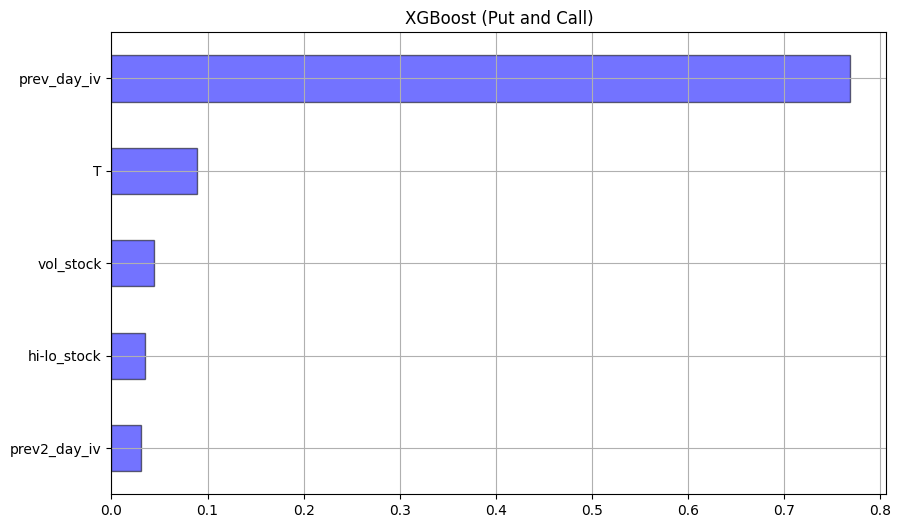

In [115]:
# import numpy as np
# import pandas as pd
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV
# import matplotlib.pyplot as plt

# # Assuming 'data_train' and 'data_test' are already defined and loaded

# # # Prepare train data for Call and Put options
# # data_train_c = data_train[data_train['cp_flag'] == 'C']
# # data_train_p = data_train[data_train['cp_flag'] == 'P']

# # # Prepare test data for Call and Put options
# # data_test_c = data_test[data_test['cp_flag'] == 'C']
# # data_test_p = data_test[data_test['cp_flag'] == 'P']


# # XGBoost Model with GridSearchCV
# def prepare_xgb_with_gridsearch(train_data, test_data, option_type):
#     """
#     Prepare the data, train XGBoost using GridSearchCV, and evaluate both in-sample and out-of-sample performance.
    
#     Parameters:
#     train_data (pd.DataFrame): The training dataset.
#     test_data (pd.DataFrame): The testing dataset.
#     option_type (str): Call or Put option type for labeling the print output.
    
#     Returns:
#     feature_importances (pd.Series): The importance of features from the best model.
#     """
#     # Prepare the train and test data
#     X_train = train_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Training features
#     y_train = train_data['impl_volatility']  # Training target
    
#     X_test = test_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Test features
#     y_test = test_data['impl_volatility']  # Test target

#     # Define parameter grid for GridSearchCV with regularization terms for Call and Put separately
#     if option_type == 'Call':
#         param_grid = {'learning_rate': [0.01], 'max_depth': [5], 'n_estimators': [500]}  # Call
#     else:
#         param_grid = {'learning_rate': [0.01], 'max_depth': [7], 'n_estimators': [500]}  # Put

#     # Initialize the XGBRegressor
#     XGBmodel = XGBRegressor()

#     # Perform GridSearchCV to find the best hyperparameters
#     grid_search = GridSearchCV(estimator=XGBmodel, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#     print(f"Running GridSearchCV for {option_type} Options...")
#     grid_search.fit(X_train, y_train)

#     # Get the best parameters and the best estimator
#     best_params = grid_search.best_params_
#     print(f"\nBest Parameters for {option_type} Options: {best_params}")

#     # Initialize the best XGB model with the best params
#     best_XGB_model = XGBRegressor(**best_params)

#     print(f"\nTraining the XGB model for {option_type} Options...")
#     best_XGB_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

#     # In-sample (training set) predictions
#     y_train_pred = best_XGB_model.predict(X_train)

#     # Out-of-sample (test set) predictions
#     y_test_pred = best_XGB_model.predict(X_test)

#     # Evaluate In-Sample Performance (on Training Data)
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
#     r2_train = r2_score(y_train, y_train_pred)

#     # Evaluate Out-of-Sample Performance (on Test Data)
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#     r2_test = r2_score(y_test, y_test_pred)

#     # Print the results
#     print(f"\nPerformance for {option_type} Options:")
#     print(f"In-Sample RMSE (Training): {rmse_train:.4f}")
#     print(f"In-Sample R² (Training): {r2_train:.4f}")
#     print(f"Out-of-Sample RMSE (Test): {rmse_test:.4f}")
#     print(f"Out-of-Sample R² (Test): {r2_test:.4f}")

#     # Extract and return feature importances
#     feature_importances = pd.Series(best_XGB_model.feature_importances_, index=X_train.columns)
#     return feature_importances


# # Call the function for Call options data
# feature_importance_xgb_c = prepare_xgb_with_gridsearch(data_train_c, data_test_c, 'Call')

# # Call the function for Put options data
# feature_importance_xgb_p = prepare_xgb_with_gridsearch(data_train_p, data_test_p, 'Put')


# # Plot Feature Importance for XGBoost
# def plot_feature_importance_xgb(feature_importance_call, feature_importance_put, top_n=5):
#     """
#     Create a bar plot showing the top N average feature importance of both Call and Put options for XGBoost.

#     Parameters:
#     feature_importance_call (pd.Series): XGBoost feature importance for Call options.
#     feature_importance_put (pd.Series): XGBoost feature importance for Put options.
#     top_n (int): Number of top features to plot.
#     """
#     # Combine the importance of features from both Call and Put
#     combined_importance = pd.concat([feature_importance_call, feature_importance_put], axis=1, keys=["Call", "Put"]).fillna(0)

#     # Calculate the average importance
#     combined_importance["Average"] = combined_importance.mean(axis=1)

#     # Select the top N features based on average importance
#     top_features = combined_importance["Average"].sort_values(ascending=False).head(top_n)

#     # Plot the top N average feature importance
#     plt.figure(figsize=(10, 6))
#     ax = top_features.sort_values(ascending=True).plot(kind='barh', color='blue', alpha=0.55, edgecolor='black', linewidth=1)
#     plt.grid(True)  # Add grid
#     ax.set_title('XGBoost (Put and Call)')
#     # ax.set_xlabel('Importance')  # Add x-label
#     plt.show()

# # Example usage: Plot the top 5 features
# plot_feature_importance_xgb(feature_importance_xgb_c, feature_importance_xgb_p, top_n=5)


In [103]:
feature_importance_xgb_c

prev_day_iv     0.750946
T               0.088031
vol_stock       0.049016
prev2_day_iv    0.035042
hi-lo_stock     0.036812
1Y_bond         0.032480
moneyness       0.007674
dtype: float32

In [152]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Set random seeds for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

# Set the seed before training
set_seed(42)

def prepare_data_with_gridsearch(train_data, test_data, option_type):
    """
    Prepare the data, train XGBoost using GridSearchCV, and evaluate both in-sample and out-of-sample performance.
    
    Parameters:
    train_data (pd.DataFrame): The training dataset.
    test_data (pd.DataFrame): The testing dataset.
    option_type (str): Call or Put option type for labeling the print output.
    """
    # Prepare the train and test data
    X_train = train_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Training features
    y_train = train_data['impl_volatility']  # Training target
    
    X_test = test_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Test features
    y_test = test_data['impl_volatility']  # Test target

    # Define parameter grid for GridSearchCV with regularization terms
    # param_grid = {
    #     'max_depth': [3, 5, 7],                  
    #     'n_estimators': [300, 400, 500],
    #     'learning_rate': [0.001, 0.01, 0.1], 
    # }   

    param_grid = {'learning_rate': [0.01], 'max_depth': [7], 'n_estimators': [400]}

    # Initialize the XGBRegressor
    XGBmodel = XGBRegressor()

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=XGBmodel, param_grid=param_grid, 
                               cv=3, n_jobs=-1, verbose=2)

    print(f"Running GridSearchCV for {option_type} Options...")
    grid_search.fit(X_train, y_train)

    # Get the best parameters and use them for the final model
    best_params = grid_search.best_params_
    print(f"\nBest Parameters for {option_type} Options: {best_params}")

    # Initialize the best model with early stopping manually
    best_XGB_model = XGBRegressor(**best_params)

    print(f"\nTraining the model with early stopping for {option_type} Options...")
    best_XGB_model.fit(X_train, y_train, 
                       eval_set=[(X_test, y_test)], 
                    #    early_stopping_rounds=50,  # Early stopping to prevent overfitting
                       verbose=True)

    # In-sample (training set) predictions
    y_train_pred = best_XGB_model.predict(X_train)

    # Out-of-sample (test set) predictions
    y_test_pred = best_XGB_model.predict(X_test)

    # Evaluate In-Sample Performance (on Training Data)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    # Evaluate Out-of-Sample Performance (on Test Data)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    # Plot actual vs predicted implied volatility
    # plt.figure(figsize=(12, 6))
    # plt.scatter(data_test_p['date'], data_test_p['impl_volatility'], label='Actual Implied Volatility', color='blue', alpha=0.6, s=10)
    # plt.scatter(data_test_p['date'], y_test_pred, label='Predicted Implied Volatility', color='red', alpha=0.6, s=10)
    # plt.xlabel('Date')
    # plt.ylabel('Implied Volatility')
    # plt.title('Actual vs Predicted Implied Volatility')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # Print the results
    print(f"\nPerformance for {option_type} Options:")
    print(f"In-Sample RMSE (Training): {rmse_train:.4f}")
    print(f"In-Sample R² (Training): {r2_train:.4f}")
    print(f"Out-of-Sample RMSE (Test): {rmse_test:.4f}")
    print(f"Out-of-Sample R² (Test): {r2_test:.4f}")

    # Ensure in-sample R² is less than 0.9
    if r2_train >= 0.9:
        print(f"Warning: In-Sample R² is too high ({r2_train:.4f}). Consider increasing regularization or reducing model complexity.")

    return best_XGB_model
# Call the function for Call options data
best_model_call = prepare_data_with_gridsearch(data_train_c, data_test_c, 'Call')

# Call the function for Put options data (uncomment to run)
# best_model_put = prepare_data_with_gridsearch(data_train_p, data_test_p, 'Put')


Running GridSearchCV for Call Options...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=400; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=400; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=400; total time=   1.8s

Best Parameters for Call Options: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 400}

Training the model with early stopping for Call Options...
[0]	validation_0-rmse:0.25813
[1]	validation_0-rmse:0.25613
[2]	validation_0-rmse:0.25414
[3]	validation_0-rmse:0.25218
[4]	validation_0-rmse:0.25024
[5]	validation_0-rmse:0.24832
[6]	validation_0-rmse:0.24649
[7]	validation_0-rmse:0.24464
[8]	validation_0-rmse:0.24279
[9]	validation_0-rmse:0.24100
[10]	validation_0-rmse:0.23924
[11]	validation_0-rmse:0.23748
[12]	validation_0-rmse:0.23578
[13]	validation_0-rmse:0.23407
[14]	validation_0-rmse:0.23235
[15]	validation_0-rmse:0.23071
[16]	validation

In [153]:
from sklearn.inspection import permutation_importance


# Prepare the train and test data
X_train_c = data_train_c.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Training features
y_train_c = data_train_c['impl_volatility']  # Training target

X_test_c = data_test_c.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Test features
y_test_c = data_test_c['impl_volatility']  # Test target



results_p = permutation_importance(best_model_call, X_train_c, y_train_c, n_repeats=1, random_state=42) #NEW
    # Get the feature importances and feature names
importance = results_p.importances_mean #NEW



import pandas as pd

# Get predictions
pred_y_c = best_model_call.predict(X_train_c)

# Calculate mean squared error
mse_score = mean_squared_error(y_train_c, pred_y_c)

# Assuming 'importance' is a list or array of feature importances
# Create a DataFrame with feature importance scores
feature_importance_networks = pd.DataFrame({
    'feature': X_train_c.columns,  # Assuming feature names come from 'combined_x_p'
    'importance': importance  # Assuming 'importance' is a list or array of the same length as the number of features
})

# Print the MSE score (separately from the feature importances)
print(f"Mean Squared Error (MSE): {mse_score}")

# Sort by 'importance' in descending order
sorted_importance_c = feature_importance_networks.sort_values(by='importance', ascending=False)

# Display sorted feature importances
(sorted_importance_c)



Mean Squared Error (MSE): 0.010234651223171827


,feature,importance
0,prev_day_iv,1.318043
1,T,0.207642
4,gold_price,0.137500
3,prev2_day_iv,0.121506
2,volume_option,0.026977


<Figure size 1000x600 with 0 Axes>

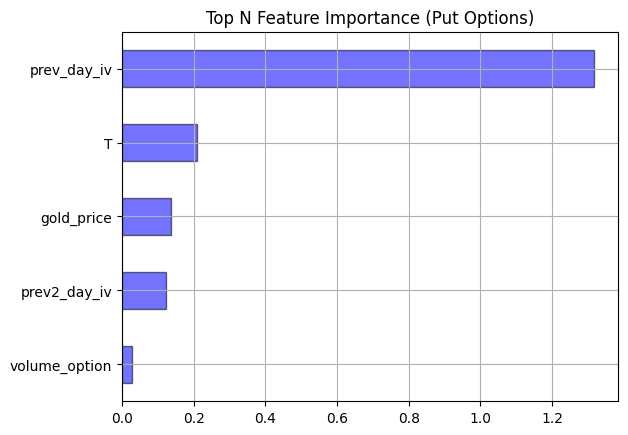

In [154]:
import matplotlib.pyplot as plt

def plot_feature_importance_barplot(sorted_importance, top_n=5):
    """
    Create a horizontal bar plot showing the top N feature importance.

    Parameters:
    sorted_importance (pd.DataFrame): Sorted feature importance DataFrame.
    top_n (int): Number of top features to plot.
    """
    # Select the top N features based on importance
    top_features = sorted_importance.head(top_n)

    # Sort the top N features by importance for plotting
    top_features = top_features.sort_values(by='importance', ascending=True)

    # Plot the top N feature importance
    plt.figure(figsize=(10, 6))
    ax = top_features.plot(kind='barh', x='feature', y='importance', color='blue', alpha=0.55, edgecolor='black', linewidth=1)
    
    # Remove the y-label
    ax.set_ylabel('')
    
    # Remove the legend
    ax.get_legend().remove()
    
    # Add grid and title
    plt.grid(True)
    ax.set_title('Top N Feature Importance (Put Options)')
    
    # plt.tight_layout()  # Optional: for better layout
    plt.show()

# Example usage: Plot the top 5 features from Put options data
plot_feature_importance_barplot(sorted_importance_c, top_n=5)


In [141]:
from sklearn.inspection import permutation_importance

data_train_p

# Prepare the train and test data
X_train_p = data_train_p.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Training features
y_train_p = data_train_p['impl_volatility']  # Training target

X_test_P = data_test_p.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Test features
y_test_p = data_test_p['impl_volatility']  # Test target



results_p = permutation_importance(best_model_put, X_train_p, y_train_p, n_repeats=1, random_state=42) #NEW
    # Get the feature importances and feature names
importance = results_p.importances_mean #NEW



import pandas as pd

# Get predictions
pred_y_p = best_model_put.predict(X_train_p)

# Calculate mean squared error
mse_score = mean_squared_error(y_train_p, pred_y_p)

# Assuming 'importance' is a list or array of feature importances
# Create a DataFrame with feature importance scores
feature_importance_networks = pd.DataFrame({
    'feature': X_train_p.columns,  # Assuming feature names come from 'combined_x_p'
    'importance': importance  # Assuming 'importance' is a list or array of the same length as the number of features
})

# Print the MSE score (separately from the feature importances)
print(f"Mean Squared Error (MSE): {mse_score}")

# Sort by 'importance' in descending order
sorted_importance_p = feature_importance_networks.sort_values(by='importance', ascending=False)

# Display sorted feature importances
(sorted_importance_p)



Mean Squared Error (MSE): 0.011696127529435732


,feature,importance
0,prev_day_iv,1.445662
1,T,0.176395
4,5_day_rolling_return_stock,0.105462
3,prev2_day_iv,0.096065
2,volume_option,0.025299


NameError: name 'feature' is not defined

<Figure size 1000x600 with 0 Axes>

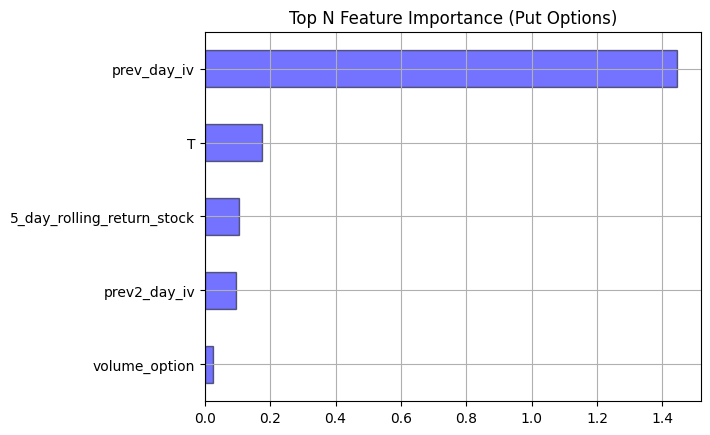

In [142]:
import matplotlib.pyplot as plt

def plot_feature_importance_barplot(sorted_importance, top_n=5):
    """
    Create a horizontal bar plot showing the top N feature importance.

    Parameters:
    sorted_importance (pd.DataFrame): Sorted feature importance DataFrame.
    top_n (int): Number of top features to plot.
    """
    # Select the top N features based on importance
    top_features = sorted_importance.head(top_n)

    # Sort the top N features by importance for plotting
    top_features = top_features.sort_values(by='importance', ascending=True)

    # Plot the top N feature importance
    plt.figure(figsize=(10, 6))
    ax = top_features.plot(kind='barh', x='feature', y='importance', color='blue', alpha=0.55, edgecolor='black', linewidth=1)
    
    # Remove the y-label
    ax.set_ylabel('')
    
    # Remove the legend
    ax.get_legend().remove()
    
    # Add grid and title
    plt.grid(True)
    ax.set_title('Top N Feature Importance (Put Options)')
    
    # plt.tight_layout()  # Optional: for better layout
    plt.show()

# Example usage: Plot the top 5 features from Put options data
plot_feature_importance_barplot(sorted_importance_p, top_n=5)


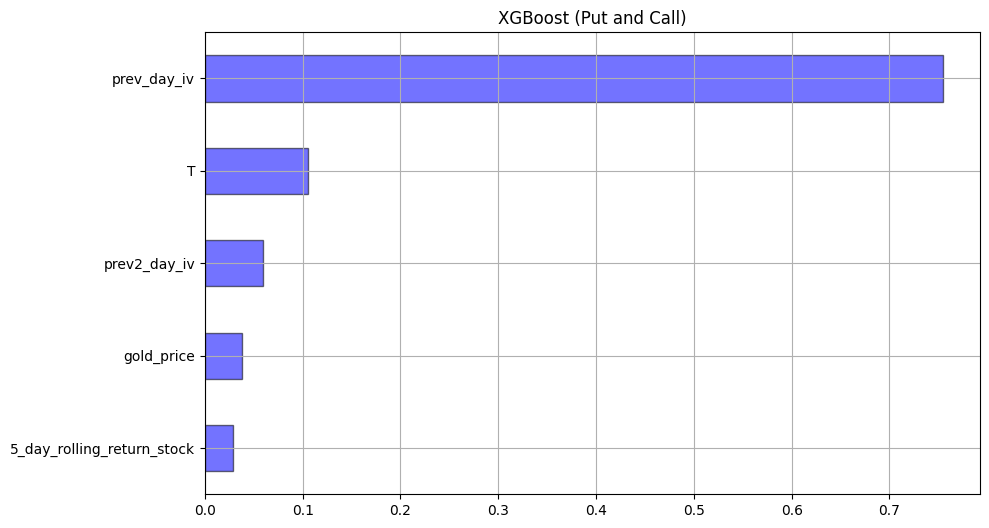

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_combined_feature_importance_barplot(sorted_importance_c, sorted_importance_p, top_n=5):
    """
    Create a horizontal bar plot showing the top N normalized average feature importance from both Call and Put options.

    Parameters:
    sorted_importance_c (pd.DataFrame): Sorted feature importance DataFrame for Call options.
    sorted_importance_p (pd.DataFrame): Sorted feature importance DataFrame for Put options.
    top_n (int): Number of top features to plot.
    """
    # Merge Call and Put DataFrames on feature name to get both importance values
    combined_importance = pd.concat(
        [sorted_importance_c.set_index('feature'), sorted_importance_p.set_index('feature')], 
        axis=1, keys=["importance_call", "importance_put"]
    ).fillna(0).reset_index()

    # print(combined_importance)
    
    # Normalize the importance values to sum to 1 for both Call and Put
    combined_importance['importance_call'] /= combined_importance['importance_call'].sum()
    combined_importance['importance_put'] /= combined_importance['importance_put'].sum()

    # Calculate the average normalized importance
    combined_importance['average_importance'] = combined_importance[['importance_call', 'importance_put']].mean(axis=1)
    
    # Sort by the average importance and select the top N features
    top_features = combined_importance.sort_values(by='average_importance', ascending=False).head(top_n)

    # Plot the top N normalized average feature importance with a larger size
    # plt.figure(figsize=((10, 6)))  # Adjust this as needed for the correct aspect ratio
    fig, ax = plt.subplots(figsize=(10, 6))

    ax = top_features.sort_values(by='average_importance', ascending=True).plot(
        kind='barh', 
        x='feature', 
        y='average_importance', 
        color='blue', 
        alpha=0.55, 
        edgecolor='black', 
        linewidth=1,
        ax=ax  # Use the ax from fig
    )
    
    # Remove the y-label
    ax.set_ylabel('')
    
    # Remove the legend
    ax.get_legend().remove()
    
    # Add grid and title
    plt.grid(True)
    ax.set_title('XGBoost (Put and Call)')
    
    plt.show()

# Example usage: Plot the top 5 normalized features from combined Call and Put options data
plot_combined_feature_importance_barplot(sorted_importance_c, sorted_importance_p, top_n=5)


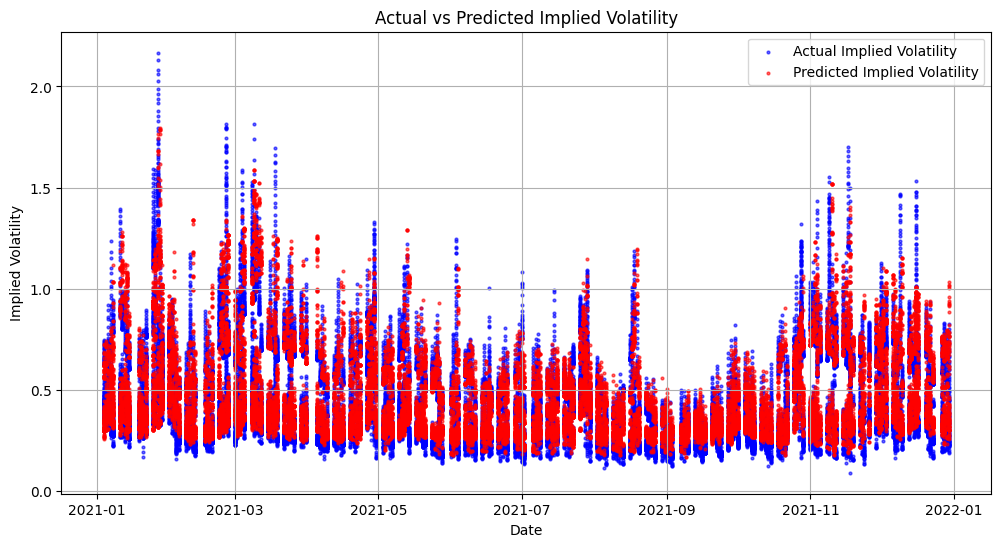

In [58]:
# Plot actual vs predicted implied volatility
plt.figure(figsize=(12, 6))
plt.scatter(data_test_c['date'], data_test_c['impl_volatility'], label='Actual Implied Volatility', color='blue', alpha=0.6, s=4)
plt.scatter(data_test_c['date'], y_test_pred1, label='Predicted Implied Volatility', color='red', alpha=0.6, s=4)
plt.xlabel('Date')
plt.ylabel('Implied Volatility')
plt.title('Actual vs Predicted Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
data_test_c

,cp_flag,Ticker,date,impl_volatility,prev_day_iv,T,vol_stock,prev2_day_iv,hi-lo_stock,1Y_bond,moneyness
0,C,AAPL,2021-01-04,0.433412,0.337114,0.019841,95485520.0,0.325650,2.59002,0.1074,-0.475
1,C,AAPL,2021-01-04,0.428775,0.332640,0.019841,95485520.0,0.312515,2.59002,0.1074,-0.345
2,C,AAPL,2021-01-04,0.426358,0.330864,0.019841,95485520.0,0.308907,2.59002,0.1074,-0.216
3,C,AAPL,2021-01-04,0.422649,0.329431,0.019841,95485520.0,0.306933,2.59002,0.1074,-0.088
4,C,AAPL,2021-01-04,0.421479,0.328318,0.019841,95485520.0,0.305940,2.59002,0.1074,0.039
...,...,...,...,...,...,...,...,...,...,...,...
36347,C,TSLA,2021-12-30,0.742669,0.718058,0.007937,20025526.0,0.773147,40.57984,0.4878,1.556
36348,C,TSLA,2021-12-30,0.764381,0.735985,0.007937,20025526.0,0.789361,40.57984,0.4878,1.658
36349,C,TSLA,2021-12-30,0.786317,0.754168,0.007937,20025526.0,0.807648,40.57984,0.4878,1.760
36350,C,TSLA,2021-12-30,0.798978,0.773210,0.007937,20025526.0,0.821686,40.57984,0.4878,1.861


# New improved set to get reduce overfit

In [127]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Assuming 'data_train' and 'data_test' are already defined and loaded

# Prepare train data for Call and Put options
data_train_c = data_train[data_train['cp_flag'] == 'C']
data_train_p = data_train[data_train['cp_flag'] == 'P']

# Prepare test data for Call and Put options
data_test_c = data_test[data_test['cp_flag'] == 'C']
data_test_p = data_test[data_test['cp_flag'] == 'P']

def prepare_data_with_gridsearch(train_data, test_data, option_type):
    """
    Prepare the data, train XGBoost using GridSearchCV, and evaluate both in-sample and out-of-sample performance.
    
    Parameters:
    train_data (pd.DataFrame): The training dataset.
    test_data (pd.DataFrame): The testing dataset.
    option_type (str): Call or Put option type for labeling the print output.
    """
    # Prepare the train and test data
    X_train = train_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Training features
    y_train = train_data['impl_volatility']  # Training target
    
    X_test = test_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Test features
    y_test = test_data['impl_volatility']  # Test target

    # Define parameter grid for GridSearchCV
    param_grid = {
        'max_depth': [7],                  
        'n_estimators': [800],    
        'learning_rate': [0.01],     
    }   

    # Initialize the XGBRegressor
    XGBmodel = XGBRegressor()

    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=XGBmodel, param_grid=param_grid, 
                               cv=3, n_jobs=-1, verbose=2)

    print(f"Running GridSearchCV for {option_type} Options...")
    grid_search.fit(X_train, y_train)

    # Get the best parameters and use them for the final model
    best_params = grid_search.best_params_
    print(f"\nBest Parameters for {option_type} Options: {best_params}")

    # Initialize the best model with early stopping manually
    best_XGB_model = XGBRegressor(**best_params)

    print(f"\nTraining the model with early stopping for {option_type} Options...")
    best_XGB_model.fit(X_train, y_train, 
                       eval_set=[(X_test, y_test)], 
                       verbose=True)

    # In-sample (training set) predictions
    y_train_pred = best_XGB_model.predict(X_train)

    # Out-of-sample (test set) predictions
    y_test_pred = best_XGB_model.predict(X_test)

    # Evaluate In-Sample Performance (on Training Data)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    # Evaluate Out-of-Sample Performance (on Test Data)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    # Print the results
    print(f"\nPerformance for {option_type} Options:")
    print(f"In-Sample RMSE (Training): {rmse_train:.4f}")
    print(f"In-Sample R² (Training): {r2_train:.4f}")
    print(f"Out-of-Sample RMSE (Test): {rmse_test:.4f}")
    print(f"Out-of-Sample R² (Test): {r2_test:.4f}")

# Call the function for Call options data
prepare_data_with_gridsearch(data_train_c, data_test_c, 'Call')

# Call the function for Put options data
# prepare_data_with_gridsearch(data_train_p, data_test_p, 'Put')


Running GridSearchCV for Call Options...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


Python(68885) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68887) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68888) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68889) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68890) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68891) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(68892) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=800; total time=   7.2s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=800; total time=   7.2s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=800; total time=   7.2s

Best Parameters for Call Options: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 800}

Training the model with early stopping for Call Options...
[0]	validation_0-rmse:0.25812
[1]	validation_0-rmse:0.25615
[2]	validation_0-rmse:0.25419
[3]	validation_0-rmse:0.25223
[4]	validation_0-rmse:0.25036
[5]	validation_0-rmse:0.24848
[6]	validation_0-rmse:0.24667
[7]	validation_0-rmse:0.24484
[8]	validation_0-rmse:0.24300
[9]	validation_0-rmse:0.24126
[10]	validation_0-rmse:0.23948
[11]	validation_0-rmse:0.23776
[12]	validation_0-rmse:0.23599
[13]	validation_0-rmse:0.23428
[14]	validation_0-rmse:0.23269
[15]	validation_0-rmse:0.23099
[16]	validation_0-rmse:0.22944
[17]	validation_0-rmse:0.22785
[18]	validation_0-rmse:0.22633
[19]	validation_0-rmse

In [9]:
# import time
# import itertools
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import pandas as pd

# def prepare_data_with_gridsearch(train_data, validate_data, test_data, option_type, verbose=True):
#     """
#     Prepare the data, perform hyperparameter tuning using Year 1 (train) and Year 2 (validation),
#     retrain the model on Year 1 + Year 2, and evaluate on Year 3 (test).
    
#     Parameters:
#     train_data (pd.DataFrame): The training dataset (Year 1).
#     validate_data (pd.DataFrame): The validation dataset (Year 2).
#     test_data (pd.DataFrame): The testing dataset (Year 3).
#     option_type (str): Call or Put option type for labeling the print output.
#     verbose (bool): If True, prints progress information for hyperparameter tuning.
#     """
#     # Prepare the train, validation, and test data
#     X_train = train_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Training features (Year 1)
#     y_train = train_data['impl_volatility']  # Training target (Year 1)

#     X_validate = validate_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Validation features (Year 2)
#     y_validate = validate_data['impl_volatility']  # Validation target (Year 2)
    
#     X_test = test_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Test features (Year 3)
#     y_test = test_data['impl_volatility']  # Test target (Year 3)

#     # Define the hyperparameter grid
#     # param_grid = {
#     #     'max_depth': [3, 5, 7],                  
#     #     'n_estimators': [100, 200, 300, 500],    
#     #     'learning_rate': [0.001, 0.01, 0.1],    
#     #     'subsample': [0.7, 0.8, 0.9],           
#     #     'colsample_bytree': [0.7, 0.8, 0.9],    
#     #     'reg_alpha': [0, 0.1, 0.5],             
#     #     'reg_lambda': [1, 1.5, 2],              
#     # }

#     # # Best params put
#     # param_grid = {'max_depth': [3], 'n_estimators': [100], 'learning_rate': [0.1], 'subsample': [0.7], 'colsample_bytree': [0.9], 'reg_alpha': [0], 'reg_lambda': [1.5]}

#     # Best params call
#     param_grid = {'max_depth': [3], 'n_estimators': [300], 'learning_rate': [0.01], 'subsample': [0.8], 'colsample_bytree': [0.9], 'reg_alpha': [0.5], 'reg_lambda': [1.5]}
    
#     # Generate all combinations of hyperparameters
#     param_combinations = list(itertools.product(
#         param_grid['max_depth'], 
#         param_grid['n_estimators'], 
#         param_grid['learning_rate'],
#         param_grid['subsample'],
#         param_grid['colsample_bytree'],
#         param_grid['reg_alpha'],
#         param_grid['reg_lambda']
        
#     ))

#     total_combinations = len(param_combinations)
    
#     # Initialize variables to store the best model and best score
#     best_rmse_val = np.inf
#     best_params = None
#     best_xgb_model = None

#     print(f"Running manual hyperparameter tuning for {option_type} Options...")
    
#     # Iterate over all hyperparameter combinations with progress tracking
#     for i, (max_depth, n_estimators, learning_rate, subsample, colsample_bytree, reg_alpha, reg_lambda) in enumerate(param_combinations):
#         start_time = time.time()
        
#         # Initialize the XGBRegressor with the current set of hyperparameters
#         xgb_model = XGBRegressor(
#             max_depth=max_depth, 
#             n_estimators=n_estimators,
#             learning_rate=learning_rate,
#             subsample=subsample,
#             colsample_bytree=colsample_bytree,
#             reg_alpha=reg_alpha,
#             reg_lambda=reg_lambda,
#             objective='reg:squarederror',
#             n_jobs=-1
#         )

#         # Train the model on the training data (Year 1)
#         xgb_model.fit(X_train, y_train)

#         # Validate the model on the validation data (Year 2)
#         y_val_pred = xgb_model.predict(X_validate)
#         rmse_val = np.sqrt(mean_squared_error(y_validate, y_val_pred))

#         # Track the best performing hyperparameters based on validation RMSE
#         if rmse_val < best_rmse_val:
#             best_rmse_val = rmse_val
#             best_params = {
#                 'max_depth': max_depth,
#                 'n_estimators': n_estimators,
#                 'learning_rate': learning_rate,
#                 'subsample': subsample,
#                 'colsample_bytree': colsample_bytree,
#                 'reg_alpha': reg_alpha,
#                 'reg_lambda': reg_lambda
#             }
#             best_xgb_model = xgb_model

#         # Verbose output to track progress
#         if verbose:
#             elapsed_time = time.time() - start_time
#             print(f"Combination {i + 1}/{total_combinations} completed in {elapsed_time:.2f} seconds.")
#             print(f"Current RMSE (Validation): {rmse_val:.4f}")
#             print(f"Best RMSE so far: {best_rmse_val:.4f}")
    
#     print(f"\nBest Parameters for {option_type} Options: {best_params}")
    
#     # Retrain the model on combined Year 1 (train) and Year 2 (validation)
#     print("Retraining the model on Year 1 and Year 2 combined...")
#     X_combined = pd.concat([X_train, X_validate])
#     y_combined = pd.concat([y_train, y_validate])
#     best_xgb_model.fit(X_combined, y_combined)

#     # In-sample (combined Year 1 + Year 2) predictions
#     y_combined_pred = best_xgb_model.predict(X_combined)

#     # Evaluate In-Sample Performance (on combined Year 1 + Year 2)
#     rmse_combined = np.sqrt(mean_squared_error(y_combined, y_combined_pred))
#     r2_combined = r2_score(y_combined, y_combined_pred)
    
#     print(f"\nIn-Sample Performance for {option_type} Options (Year 1 + Year 2):")
#     print(f"RMSE (Training + Validation): {rmse_combined:.4f}")
#     print(f"R² (Training + Validation): {r2_combined:.4f}")

#     # After retraining, evaluate performance on the test data (Year 3)
#     y_test_pred = best_xgb_model.predict(X_test)

#     # Evaluate Out-of-Sample Performance (on Test Data)
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#     r2_test = r2_score(y_test, y_test_pred)

#     # Print the final results
#     print(f"\nPerformance on Test Data (Year 3) for {option_type} Options:")
#     print(f"Out-of-Sample RMSE (Test): {rmse_test:.4f}")
#     print(f"Out-of-Sample R² (Test): {r2_test:.4f}")


# # Call the function for Call options data
# prepare_data_with_gridsearch(data_train_c, data_validate_c, data_test_c, 'Call')

# # Call the function for Put options data
# prepare_data_with_gridsearch(data_train_p, data_validate_p, data_test_p, 'Put')


Running manual hyperparameter tuning for Call Options...
Combination 1/2916 completed in 0.15 seconds.
Current RMSE (Validation): 0.4487
Best RMSE so far: 0.4487
Combination 2/2916 completed in 0.14 seconds.
Current RMSE (Validation): 0.4488
Best RMSE so far: 0.4487
Combination 3/2916 completed in 0.13 seconds.
Current RMSE (Validation): 0.4488
Best RMSE so far: 0.4487
Combination 4/2916 completed in 0.13 seconds.
Current RMSE (Validation): 0.4487
Best RMSE so far: 0.4487
Combination 5/2916 completed in 0.13 seconds.
Current RMSE (Validation): 0.4488
Best RMSE so far: 0.4487
Combination 6/2916 completed in 0.13 seconds.
Current RMSE (Validation): 0.4488
Best RMSE so far: 0.4487
Combination 7/2916 completed in 0.13 seconds.
Current RMSE (Validation): 0.4488
Best RMSE so far: 0.4487
Combination 8/2916 completed in 0.14 seconds.
Current RMSE (Validation): 0.4488
Best RMSE so far: 0.4487
Combination 9/2916 completed in 0.13 seconds.
Current RMSE (Validation): 0.4488
Best RMSE so far: 0.448

In [110]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
import random


# Assuming 'data_train' and 'data_test' are already defined and loaded

# Prepare train data for Call and Put options
data_train_c = data_train[data_train['cp_flag'] == 'C']
data_train_p = data_train[data_train['cp_flag'] == 'P']

# Prepare test data for Call and Put options
data_test_c = data_test[data_test['cp_flag'] == 'C']
data_test_p = data_test[data_test['cp_flag'] == 'P']

def prepare_data_with_gridsearch(train_data, test_data, option_type):
    """
    Prepare the data, train XGBoost using defined parameters, and evaluate both in-sample and out-of-sample performance.
    
    Parameters:
    train_data (pd.DataFrame): The training dataset.
    test_data (pd.DataFrame): The testing dataset.
    option_type (str): Call or Put option type for labeling the print output.
    """
    # Prepare the train and test data
    X_train = train_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Training features
    y_train = train_data['impl_volatility']  # Training target
    
    X_test = test_data.drop(columns=['impl_volatility', 'date', 'Ticker', 'cp_flag'])  # Test features
    y_test = test_data['impl_volatility']  # Test target

    # best_XGB_params = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500} #Call
    best_XGB_params = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500} #Put
    best_XGB_model = XGBRegressor(**best_XGB_params)

    # Fit the model to the training data
    print(f"Fitting the model for {option_type} options...")
    best_XGB_model.fit(X_train, y_train)  # This line must execute before any predictions
    
    # Sanity check to ensure model is fitted
    if not hasattr(best_XGB_model, 'get_booster'):
        raise ValueError(f"Model for {option_type} options is not fitted properly!")
    
    # In-sample (training set) predictions
    y_train_pred = best_XGB_model.predict(X_train)

    # Out-of-sample (test set) predictions
    y_test_pred = best_XGB_model.predict(X_test)

    # Evaluate In-Sample Performance (on Training Data)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    # Evaluate Out-of-Sample Performance (on Test Data)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    # Print the results
    print(f"\nPerformance for {option_type} Options:")
    print(f"In-Sample RMSE (Training): {rmse_train:.4f}")
    print(f"In-Sample R² (Training): {r2_train:.4f}")
    print(f"Out-of-Sample RMSE (Test): {rmse_test:.4f}")
    print(f"Out-of-Sample R² (Test): {r2_test:.4f}")


# Call the function for Call options data
# prepare_data_with_gridsearch(data_train_c, data_test_c, 'Call')

# Call the function for Put options data
prepare_data_with_gridsearch(data_train_p, data_test_p, 'Put')


Fitting the model for Put options...

Performance for Put Options:
In-Sample RMSE (Training): 0.1087
In-Sample R² (Training): 0.9238
Out-of-Sample RMSE (Test): 0.1349
Out-of-Sample R² (Test): 0.7013
